https://www.kaggle.com/datasets/vikasukani/loan-eligible-dataset

# LOAN ELIGIBILITY PREDICTION : Statistical Analysis and Predictive Modeling

### Anirudh Srivatsa
### Department of Mathematical Sciences, Stevens Institute of Technology, Hoboken, NJ
### Project Supervisor: Dr. Hadi Safari Katesari

## ABSTRACT

This project focuses on predicting loan eligibility using a dataset that includes various factors such as income, credit history, loan amount, and other demographics. The aim of the project is to identify the factors that most strongly influence loan eligibility and build a model that can accurately predict whether a loan applicant is likely to be approved or not. The project includes data exploration and visualization, feature selection, and machine learning algorithms such as linear regression and logistic regression. The results of the analysis will be interpreted and communicated effectively to stakeholders. The ultimate goal is to provide insights that can help improve the loan approval process and increase the number of successful loan applications.

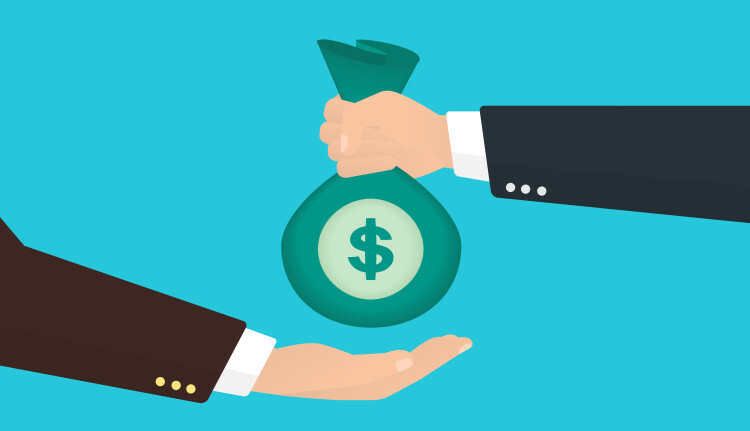

## Introduction

Loan eligibility prediction is a crucial task for banks and financial institutions as it involves evaluating the creditworthiness of a potential borrower and assessing the risk of default. This project aims to analyze a loan eligibility dataset and develop a predictive model that can accurately predict whether a borrower is eligible for a loan or not. The project will involve statistical tests and predictive modeling techniques to explore the dataset, select important features, and build a machine learning model.

The insights gained from this project can help banks and financial institutions make better loan decisions, reduce the risk of default, and increase profitability. The project will use statistical tests such as t-tests and ANOVA to compare the means of different groups and test for significant differences in loan eligibility rates across various demographic variables.Linear Regression,Logistic regression will be used to build predictive models that can accurately predict loan eligibility.

By leveraging data analytics and machine learning, banks can make better loan decisions and reduce the risk of default, leading to increased profitability and customer satisfaction. The project is significant because it addresses a critical problem faced by the banking industry and demonstrates the importance of data-driven decision-making. It can serve as a roadmap for other financial institutions looking to leverage data analytics to improve their loan eligibility process.


In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
from statsmodels.stats.weightstats import ztest
from scipy.stats import f_oneway
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from sklearn.linear_model import LogisticRegression

In [104]:
df = pd.read_csv("D:\-MA_541\PROJECT\DATASET\loan_eligible_dataset\loan-train.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Describing the data to obtain the basic Statistics

In [105]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Checking for duplicates of the columns or rows

In [106]:
df.duplicated().sum()

0

Checking and counting missing values in each columns 

In [107]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Filling the missing columns with mean values for numeric data and mode values for non numeric data

In [108]:
df.fillna(df.mean(), inplace=True)

In [109]:
df.fillna(df.mode().iloc[0], inplace=True)

In [110]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Data Description


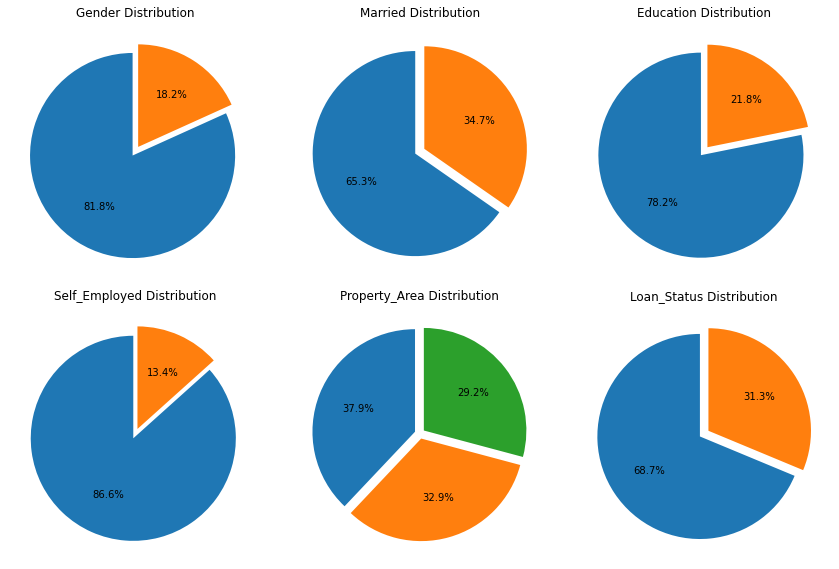

In [111]:
# select categorical variables
var = ["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]

# plot pie charts for each categorical variable in a matrix
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
for i, v in enumerate(var):
    row = i // 3
    col = i % 3
    ax = axs[row, col].pie(df[v].value_counts(), autopct='%1.1f%%', startangle=90, 
                            explode = tuple([0.05]*len(df[v].unique())))
    axs[row, col].set_ylabel('')
    axs[row, col].set_title(v + ' Distribution')
plt.tight_layout()
plt.show()


In [112]:
df.Gender.value_counts(dropna=False)

Male      502
Female    112
Name: Gender, dtype: int64

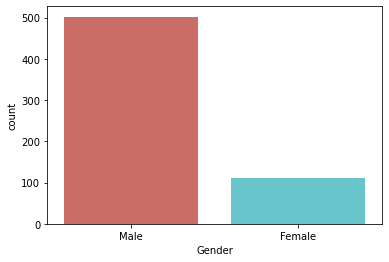

In [113]:
sns.countplot(x="Gender", data=df, palette="hls")
plt.show()

Married Status Analysis

In [114]:
df.Married.value_counts(dropna=False)

Yes    401
No     213
Name: Married, dtype: int64

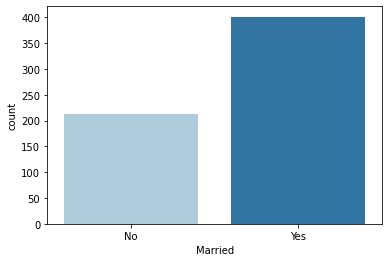

In [115]:
sns.countplot(x="Married", data=df, palette="Paired")
plt.show()

Education Analysis

In [116]:
df.Education.value_counts(dropna=False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

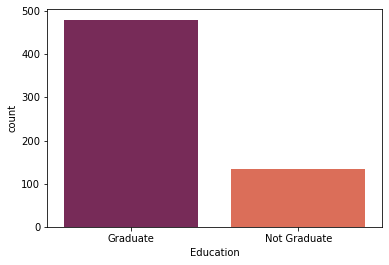

In [117]:
sns.countplot(x="Education", data=df, palette="rocket")
plt.show()

Credit History Analysis

In [118]:
df.Credit_History.value_counts(dropna=False)

1.000000    475
0.000000     89
0.842199     50
Name: Credit_History, dtype: int64

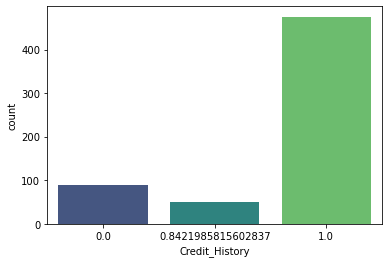

In [119]:
sns.countplot(x="Credit_History", data=df, palette="viridis")
plt.show()

Property Area Analysis

In [120]:
df.Property_Area.value_counts(dropna=False)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

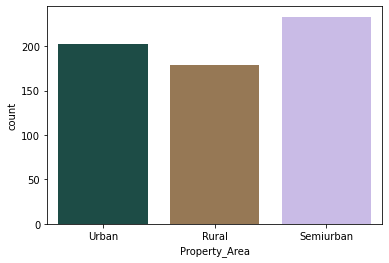

In [121]:
sns.countplot(x="Property_Area", data=df, palette="cubehelix")
plt.show()

Loan Status Analysis

In [122]:
df.Loan_Status.value_counts(dropna=False)

Y    422
N    192
Name: Loan_Status, dtype: int64

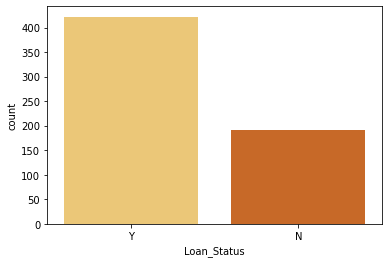

In [123]:
sns.countplot(x="Loan_Status", data=df, palette="YlOrBr")
plt.show()

In [124]:
df_duplicate = df.copy()
df_duplicate = df_duplicate.drop(["Loan_ID","Gender","Married","Dependents","Education","Self_Employed","Property_Area"],axis=1)
df_duplicate

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,5849,0.0,146.412162,360.0,1.0,Y
1,4583,1508.0,128.000000,360.0,1.0,N
2,3000,0.0,66.000000,360.0,1.0,Y
3,2583,2358.0,120.000000,360.0,1.0,Y
4,6000,0.0,141.000000,360.0,1.0,Y
...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,Y
610,4106,0.0,40.000000,180.0,1.0,Y
611,8072,240.0,253.000000,360.0,1.0,Y
612,7583,0.0,187.000000,360.0,1.0,Y


As the sample size is greater than 30, the distribution is assumed to to normal.
Since its a normal distribution, Z-test is performed to compare the 2 samples.

In [125]:
mapping = {'Male': 1, 'Female': 0}
df['Gender_numeric'] = df['Gender'].map(mapping)

In [126]:
df['Gender_numeric'].unique()

array([1, 0], dtype=int64)

In [127]:
sample1='Gender_numeric'
sample2='LoanAmount'

groups = df.groupby(sample1)

group_1_female =df[df['Gender_numeric']==0]['LoanAmount']
group_2_male =df[df['Gender_numeric']==1]['LoanAmount']


In [128]:
len(group_1_female)

112

In [129]:
len(group_2_male)

502

### 4.1 Comparing Two Samples

#### Z-test

We take the "Gender" and the "Loan amount" samples to check if there is a relationship between the them.

In [130]:
import numpy as np
from statsmodels.stats.weightstats import ztest
# Perform z-test
z_score, p_value = ztest(group_1_female, group_2_male)

# Print the results
print('\nZ-test test')
print('z-score:', z_score)
print('p-value:', p_value)
if p_value > 0.05:
    print('There is no relationship between the mean of gender and Loanamount(fail to reject H0)')
else:
    print('There is relationship between the mean of gender and Loanamount(reject H0)')


Z-test test
z-score: -2.68572530459615
p-value: 0.007237256211771812
There is relationship between the mean of gender and Loanamount(reject H0)


### 4.2 The Analysis of Variance

#### F-test (ANOVA - one way)

ANOVA, or Analysis of Variance, is a statistical technique used to compare means across two or more groups to determine if there are any statistically significant differences among them.

We are considering the loan amount and property arean to chck the relationship between.

In [131]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [132]:
#lets group the age data according to "RestingECG" categories

Urban = df[df['Property_Area'] == 'Urban']['LoanAmount']
Semiurban = df[df['Property_Area'] == 'Semiurban']['LoanAmount']
Rural = df[df['Property_Area'] == 'Rural']['LoanAmount']
f, p = stats.f_oneway(Urban, Semiurban, Rural)

# Print the results
print('\nANOVA')
print('f-statistic:', f)
print('p-value:', p)
if p > 0.05:
    print('There is no relationship between the mean of Property Area and Loan amount(fail to reject H0)')
else:
    print('There is relationship between the mean of Property Area(reject H0)')


ANOVA
f-statistic: 0.6440646848222059
p-value: 0.5255096534317127
There is no relationship between the mean of Property Area and Loan amount(fail to reject H0)


### 4.3 The Analysis of Categorical Data

#### Chi - Square Test

In [133]:
df['Credit_History'].unique()

array([1.        , 0.        , 0.84219858])

Married   No  Yes
Gender           
Female    80   32
Male     133  369
Chi-squared test statistic: 79.63562874824729
Degrees of freedom: 1
p-value: 4.502328957824834e-19
There is no relationship between the mean of Education and Credit_History(fail to reject H0)


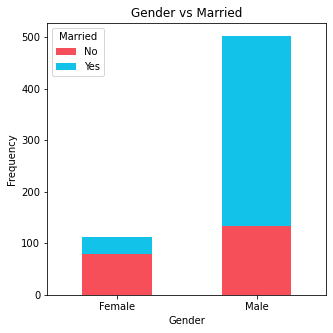

In [134]:
pd.crosstab(df.Gender,df.Married).plot(kind="bar", stacked=True, figsize=(5,5), color=['#f64f59','#12c2e9'])

# Creating a contingency table
contingency_table = pd.crosstab(df['Gender'], df['Married'])

# Print the contingency table
print(contingency_table)

# Calculating the Chi-squared test statistic, degrees of freedom, and p-value
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print('Chi-squared test statistic:', chi2)
print('Degrees of freedom:', dof)
print('p-value:', p_value)
if p > 0.05:
    print('There is no relationship between the mean of Education and Credit_History(fail to reject H0)')
else:
    print('There is relationship between the mean of Education and Credit_History(reject H0)')
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

Credit_History  0.000000  0.842199  1.000000
Married                                     
No                    32        14       167
Yes                   57        36       308
Chi-squared test statistic: 1.0964884465802485
Degrees of freedom: 2
p-value: 0.5779636952375662
There is no relationship between the mean of Married and Credit_History(fail to reject H0)


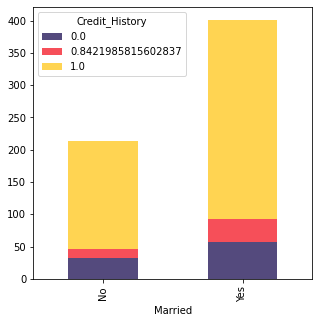

In [135]:
pd.crosstab(df.Married,df.Credit_History).plot(kind="bar", stacked=True, figsize=(5,5), color=['#544a7d','#f64f59','#ffd452'])

# Creating a contingency table
contingency_table = pd.crosstab(df['Married'], df['Credit_History'])

# Print the contingency table
print(contingency_table)

# Calculating the Chi-squared test statistic, degrees of freedom, and p-value
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print('Chi-squared test statistic:', chi2)
print('Degrees of freedom:', dof)
print('p-value:', p_value)
if p > 0.05:
    print('There is no associstion between Married and Credit_History(fail to reject H0)')
else:
    print('There is association between Married and Credit_History(reject H0)')

In [136]:
correlation_matrix=df.corr()
correlation_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_numeric
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477,0.058809
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.082912
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738,0.107930
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.073567
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000,0.012819
Gender_numeric,0.058809,0.082912,0.107930,-0.073567,0.012819,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

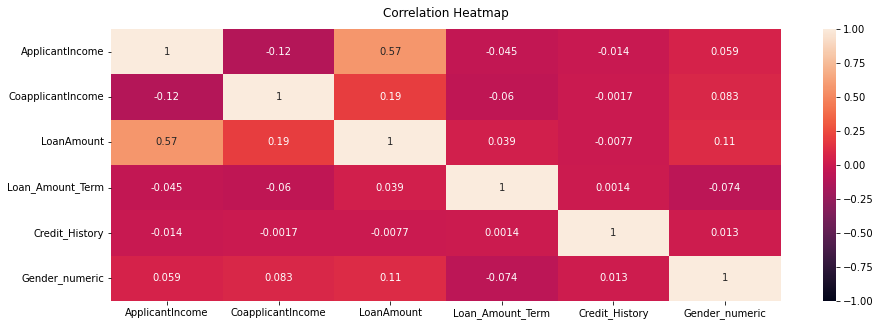

In [137]:
plt.figure(figsize=(15,5))
heatmap = sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

### 4.4 Linear Regression

In [138]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_numeric
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,1


#### Encoding the data into numerical values for modeling

In [139]:
df_n = df.copy()

df_n['Loan_Status_numeric'] = np.select([df_n['Loan_Status'] == 'Y', df_n['Loan_Status'] == 'N'],[1, 0], default=np.nan)
#df_n['Gender_numeric'] = np.select([df_n['Gender'] == 'Male', df_n['Gender'] == 'Female'],[1, 0], default=np.nan)
df_n['Education_numeric'] = np.select([df_n['Education'] == 'Graduate', df_n['Education'] == 'Not Graduate'],[1, 0], default=np.nan)
df_n['Self_Employed_numeric'] = np.select([df_n['Self_Employed'] == 'Yes', df_n['Self_Employed'] == 'No'],[1, 0], default=np.nan)
df_n['Property_Area_numeric'] = np.select([df_n['Property_Area'] == 'Urban', df_n['Property_Area'] == 'Rural' ,df_n['Property_Area'] == 'Semiurban'],[0,1,2], default=np.nan)
df_n['Dependents'].replace({'3+': 3}, inplace=True)
df_n.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_numeric,Loan_Status_numeric,Education_numeric,Self_Employed_numeric,Property_Area_numeric
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,1,1.0,1.0,0.0,0.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,1,0.0,1.0,0.0,1.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,1,1.0,1.0,1.0,0.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,1,1.0,0.0,0.0,0.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,1,1.0,1.0,0.0,0.0


In [140]:
df_n = df_n.drop(["Loan_ID","Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"],axis=1)
df_n.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_numeric,Loan_Status_numeric,Education_numeric,Self_Employed_numeric,Property_Area_numeric
0,0,5849,0.0,146.412162,360.0,1.0,1,1.0,1.0,0.0,0.0
1,1,4583,1508.0,128.000000,360.0,1.0,1,0.0,1.0,0.0,1.0
2,0,3000,0.0,66.000000,360.0,1.0,1,1.0,1.0,1.0,0.0
3,0,2583,2358.0,120.000000,360.0,1.0,1,1.0,0.0,0.0,0.0
4,0,6000,0.0,141.000000,360.0,1.0,1,1.0,1.0,0.0,0.0


### Linear Regression

In [141]:
#Splitting the data into training and testing set
x=df_n.drop(['Loan_Status_numeric'],axis=1)
y=df_n['Loan_Status_numeric']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

#Building the model
model=LinearRegression()
model.fit(x_train,y_train)

training_accuracy=model.score(x_train,y_train)
print(f"Training accuracy: {training_accuracy}")
testing_accuracy=model.score(x_test,y_test)
print(f"Testing accuracy: {testing_accuracy}")

#Evaluating the model
y_pred=model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R-squared:", r_squared)

coefficients = pd.DataFrame({'Feature': x.columns, 'Coefficient': model.coef_})
print(coefficients)

Training accuracy: 0.3207955802010525
Testing accuracy: 0.24644215438030748
MSE: 0.1715808891190057
R-squared: 0.24644215438030748
                 Feature   Coefficient
0             Dependents  3.176781e-02
1        ApplicantIncome -2.269389e-07
2      CoapplicantIncome -1.199827e-06
3             LoanAmount -1.805698e-04
4       Loan_Amount_Term  5.852086e-05
5         Credit_History  7.180999e-01
6         Gender_numeric -6.517376e-04
7      Education_numeric  4.900623e-02
8  Self_Employed_numeric  3.626470e-04
9  Property_Area_numeric  4.972522e-02


### Logistic Regression

In [142]:
# creating logistic regression object
model_logreg = LogisticRegression()

# training the model on the training data
model_logreg.fit(x_train, y_train)

training_accuracy=model_logreg.score(x_train,y_train)
print(f"Training accuracy: {training_accuracy}")
testing_accuracy=model_logreg.score(x_test,y_test)
print(f"Testing accuracy: {testing_accuracy}")

# making predictions on the test data
y_pred = model_logreg.predict(x_test)

# calculating accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy:{accuracy*100}%")

Training accuracy: 0.8173913043478261
Testing accuracy: 0.7727272727272727
Accuracy:77.27272727272727%


### From this we can understand that Logistic Regression in a better model than Linear Regression.

### 4.5 Resampling Methods

#### K-Fold Cross validation

In [143]:
# Initializing a k-fold cross-validation object
from sklearn.model_selection import KFold
k = 15
kf = KFold(n_splits=k)
# Initializing an empty list to store the accuracy scores for each fold
accuracy_scores = []
# Iterating over each fold
for train_index, test_index in kf.split(x):
 # Split the data into training and testing sets for this fold
     x_train, x_val = x.iloc[train_index,:], x.iloc[test_index,:]
     y_train, y_val = y.iloc[train_index], y.iloc[test_index]

     # Initializing a logistic regression model
     model = LogisticRegression()

     # Training the model on the training set for this fold
     model.fit(x_train, y_train)

     # Making predictions on the testing set for this fold
     y_pred = model.predict(x_val)

     # Calculating the accuracy score for this fold and append it to the list of accuracy scores
     accuracy_scores.append((accuracy_score(y_val, y_pred))*100)


# Calculating the average accuracy score across all folds
average_accuracy_score = sum(accuracy_scores) / k
print("Accuracy score of each fold: ", accuracy_scores)
# Printing the average accuracy score
print(f"Average accuracy score:, {average_accuracy_score}%")

Accuracy score of each fold:  [73.17073170731707, 82.92682926829268, 85.36585365853658, 73.17073170731707, 73.17073170731707, 80.48780487804879, 75.60975609756098, 82.92682926829268, 80.48780487804879, 87.8048780487805, 87.8048780487805, 82.92682926829268, 75.60975609756098, 87.8048780487805, 80.0]
Average accuracy score:, 80.61788617886177%


#### Bootstrap

In [144]:
from sklearn.utils import resample

# Setting the number of bootstrap samples to create
n_bootstraps = 10

# Initializing a list to store the accuracies
bootstrapped_accuracies = []

# Perform the bootstrapping
for i in range(n_bootstraps):
    # Resampling the training data with replacement
    x_train_boot, y_train_boot = resample(x_train, y_train, replace=True, random_state=i)

    # Training the logistic regression model on the resampled data
    model=LogisticRegression()
    
    model.fit(x_train_boot,y_train_boot)
    
    #evaluating its accuracy on the testing set
    
    y_pred = model.predict(x_test)
    
    accuracy=accuracy_score(y_test,y_pred)
    
    
    # Appending the bootstrapped accuracy to the list
    bootstrapped_accuracies.append(accuracy)

# Computing the mean and standard deviation of the bootstrapped accuracies
mean_bootstrapped_accuracy = np.mean(bootstrapped_accuracies)

print(f"Accuracy Score of each bootstrap sample:{bootstrapped_accuracies}")
print(f"Mean of bootstrapped accuracies: {mean_bootstrapped_accuracy}")

Accuracy Score of each bootstrap sample:[0.7792207792207793, 0.7857142857142857, 0.7662337662337663, 0.7792207792207793, 0.7727272727272727, 0.7792207792207793, 0.7792207792207793, 0.7727272727272727, 0.7792207792207793, 0.7727272727272727]
Mean of bootstrapped accuracies: 0.7766233766233765


### 4.6 Linear Model Selection and Regularization

In [145]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score

# Separate the features and target variable
X = df_n.drop('Loan_Status_numeric', axis=1)
y = df_n['Loan_Status_numeric']

# Convert categorical variables to numerical
X = pd.get_dummies(X)

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create a logistic regression model
model = LogisticRegression()

# Use SequentialFeatureSelector to perform forward stepwise selection
sfs = SequentialFeatureSelector(model, n_features_to_select=5, direction='forward', scoring='accuracy', cv=5)

# Train the sequential feature selector on the training data
sfs.fit(X, y)


# Print the selected feature indices and names
print("Selected feature indices:", sfs.get_support(indices=True))
print("Selected feature names:", x_train.columns[sfs.get_support(indices=True)])

# Fit the logistic regression model on the selected features
model.fit(X[:, sfs.get_support(indices=True)], y)

# Make predictions on the testing data
y_pred = model.predict(X[:, sfs.get_support(indices=True)])

# Calculate the accuracy score on the testing data
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy score on the testing data:, {accuracy*100}%")


Selected feature indices: [0 1 2 3 4]
Selected feature names: Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')
Accuracy score on the testing data:, 81.10749185667753%


In [146]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Separate the features and target variable
X = df_n.drop('Loan_Status_numeric', axis=1)
y = df_n['Loan_Status_numeric']

# Convert categorical variables to numerical
X = pd.get_dummies(X)

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create a logistic regression model
model = LogisticRegression()

# Use RFE to perform backward stepwise selection
rfe = RFE(model, n_features_to_select=5)

# Train the RFE on the training data
rfe.fit(X, y)

# Print the selected feature indices and names
print("Selected feature indices:", rfe.get_support(indices=True))
print("Selected feature names:", pd.DataFrame(X).columns[rfe.get_support(indices=True)])

# Fit the logistic regression model on the selected features
model.fit(X[:, rfe.get_support(indices=True)], y)

# Make predictions on the testing data
y_pred = model.predict(X[:, rfe.get_support(indices=True)])

# Calculate the accuracy score on the testing data
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy score on the testing data: {accuracy*100}%")

Selected feature indices: [ 1  4  6  8 12]
Selected feature names: Int64Index([1, 4, 6, 8, 12], dtype='int64')
Accuracy score on the testing data: 81.27035830618892%


#### Lasso Logistic Regression

In [147]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, accuracy_score

# Separate the features and target variable
X = df_n.drop('Loan_Status_numeric', axis=1)
y = df_n['Loan_Status_numeric']

# Convert categorical variables to numerical
X = pd.get_dummies(X)

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create a Lasso regression model
model = Lasso(alpha=0.01)

# Fit the Lasso regression model
model.fit(X, y)

# Make predictions on the testing data
y_pred = model.predict(X)

# Calculate the mean squared error on the testing data
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error on the testing data: {mse}")

# Calculate the accuracy score on the testing data
y_pred = [1 if i > 0.5 else 0 for i in y_pred]
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy score on the testing data: {accuracy*100}%")


Mean Squared Error on the testing data: 0.14886385117193923
Accuracy score on the testing data: 81.10749185667753%


#### Ridge Regression

In [148]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd


# Separate the features and target variable
X = df_n.drop('Loan_Status_numeric', axis=1)
y = df_n['Loan_Status_numeric']

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Ridge regression model
model = Ridge(alpha=0.5)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)


# Calculate the test error
test_error = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on the testing data: {test_error}")

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test, y_pred.round())
print(f"Test accuracy: {test_accuracy*100}%")


Mean Squared Error on the testing data: 0.16283380372742493
Test accuracy: 78.86178861788618%


### 4.7 Moving Beyond Linearity

#### polynomial Regression

In [149]:
from sklearn.preprocessing import PolynomialFeatures
#Splitting the data into training and testing set
x=df_n.drop(['Loan_Status_numeric'],axis=1)
y=df_n['Loan_Status_numeric']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
degrees = [2, 3, 4]
for deg in degrees:
    poly = PolynomialFeatures(degree=deg)
    X_poly_train = poly.fit_transform(x_train)
    X_poly_test = poly.transform(x_test)
    regressor = LinearRegression()
    regressor.fit(X_poly_train, y_train)
    y_pred = regressor.predict(X_poly_test)
    r2 = r2_score(y_test, y_pred)
    print(f"R2 score for degree {deg} polynomial regression: {r2}")

R2 score for degree 2 polynomial regression: -0.027262326912478096
R2 score for degree 3 polynomial regression: -655.7473788815064
R2 score for degree 4 polynomial regression: -7421561.278266724


In [150]:
from sklearn.metrics import mean_squared_error
# perform polynomial regression for different degrees
degrees = [1, 2, 3, 4]
for deg in degrees:
    poly = PolynomialFeatures(degree=deg)
    X_poly_train = poly.fit_transform(x_train)
    X_poly_test = poly.transform(x_test)
    regressor = LinearRegression()
    regressor.fit(X_poly_train, y_train)
    y_pred = regressor.predict(X_poly_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"MSE for degree {deg} polynomial regression: {mse}")
    print(f"RMSE for degree {deg} polynomial regression: {rmse}")

MSE for degree 1 polynomial regression: 0.17158088911901298
RMSE for degree 1 polynomial regression: 0.41422323585116877
MSE for degree 2 polynomial regression: 0.23390186225870221
RMSE for degree 2 polynomial regression: 0.48363401685437946
MSE for degree 3 polynomial regression: 149.53768957497616
RMSE for degree 3 polynomial regression: 12.228560404846359
MSE for degree 4 polynomial regression: 1689848.0478428195
RMSE for degree 4 polynomial regression: 1299.9415555488713


The negative R2 score and large MSE and RMSE values suggest that the polynomial regression
model is not a good fit for your data. A negative R2 score means that the model is performing worse
than a model that always predicts the mean of the target variable. The large MSE and RMSE values
suggest that the model is making large errors in its predictions.


#### Step Function

In [151]:
# define the intervals for ApplicantIncome variable
income_bins = [0, 5000, 10000, 20000, 50000, 100000]
income_labels = ["0-5000", "5000-10000", "10000-20000", "20000-50000", "50000+"]
# create a new column for income intervals
df_n["income_interval"] = pd.cut(df_n["ApplicantIncome"], bins=income_bins, labels=income_labels)
# check the new column
print(df_n[["ApplicantIncome", "income_interval"]].head())

   ApplicantIncome income_interval
0             5849      5000-10000
1             4583          0-5000
2             3000          0-5000
3             2583          0-5000
4             6000      5000-10000


In [152]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import r2_score, mean_squared_error
# create bins for the feature 'ApplicantIncome'
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
est.fit(x[['ApplicantIncome']])
X_binned = est.transform(x[['ApplicantIncome']])
# train a linear regression model on the binned features
model = LinearRegression()
model.fit(X_binned, y)
# predict on the training data
y_pred = model.predict(X_binned)
# predict on the training data
y_pred = model.predict(X_binned)
# calculate training accuracy
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
print(f"R-squared: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

R-squared: 0.000133802509560077
MSE: 0.21489129535980594
RMSE: 0.4635636907263186


#### From the R-squared, MSE AND RMSE we can determine that its not a very good fit for the data.

#### Spline

In [155]:
from patsy import dmatrix
# create a spline for the feature 'ApplicantIncome'
spl = dmatrix("bs(X, knots=(5000, 10000))", {"X": x[['ApplicantIncome']]}, return_type='dataframe')
X_spline = spl.to_numpy()
# train a linear regression model on the spline features
model = LinearRegression()
model.fit(X_spline, y)
# predict on the training data
y_pred = model.predict(X_spline)
# calculate R-squared
r2 = r2_score(y, y_pred)
# calculate MSE and RMSE
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
print(f"R-squared: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

R-squared: 0.00645099271670857
MSE: 0.21353360451071474
RMSE: 0.4620969644032676


#### The R-squared value of 0.006 indicates that the model explains only 0.6% of the variance in the target variable, which is very low. Additionally, the MSE and RMSE values are also quite high, indicating that the model has high prediction errors. Therefore, this is not a good score and suggests that the model is not a good fit for the data.


### Conclusion

#### To address the problem of Loan automation, a wide range of statistical techniques were employed to analyze the loan prediction dataset. First, the data was thoroughly described in terms of its numerical and categorical attributes. Next, two-sample Z-test was used to compare two groups and ANOVA was applied to compare means across multiple groups. The chi-square test was used for categorical data analysis. These techniques provided useful insights into the various factors that impact loan approval.

#### Linear and logistic regression models were used to fit the data and estimate the performance of the models. Resampling methods such as bootstrap and cross-validation were used to evaluate the models and avoid overfitting. The stepwise method was used to select important predictors in the model. The models were further improved using regularization techniques like ridge and lasso.

#### Non-linear relationships were also modeled using polynomial regression and spline regression. These models didn't provide a better fit for the data as the data has binary outcomes for which Logistic regression wa a better match.

#### Overall, these techniques provide valuable insights into the loan approval process and can assist in predicting the likelihood of loan approval. This can be particularly useful for financial institutions in making informed decisions about granting loans.

### References

https://www.kaggle.com/datasets/vikasukani/loan-eligible-dataset

https://www.researchgate.net/publication/361755492_Data_Analysis_Using_Statistical_Methods_Case_Study_of_Categorizing_the_Species_of_Penguin

Mathematical Statistics and Data Analysis, 3rd Edition, by J. A. Rice.

An Introduction to Statistical Learning with Applications in R, by G. James, D. Witten, T. Hastie, & R. Tibshirani

Safari-Katesari, H., Samadi, S. Y., & Zaroudi, S. (2020). Modelling count data via copulas. Statistics, 54(6), 1329-1355. 